<a href="https://colab.research.google.com/github/noo-nine/Machine-Learning/blob/main/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather (2).csv


In [40]:
weather = pd.read_csv('seattle-weather.csv')

In [41]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
weather.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1456,False
1457,False
1458,False
1459,False


In [42]:
weather.drop_duplicates(inplace = True)

In [43]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
# there are no na values

# **Checking if the data follows normal distribution or not**

In [44]:
features = ['precipitation', 'temp_max', 'temp_min', 'wind']

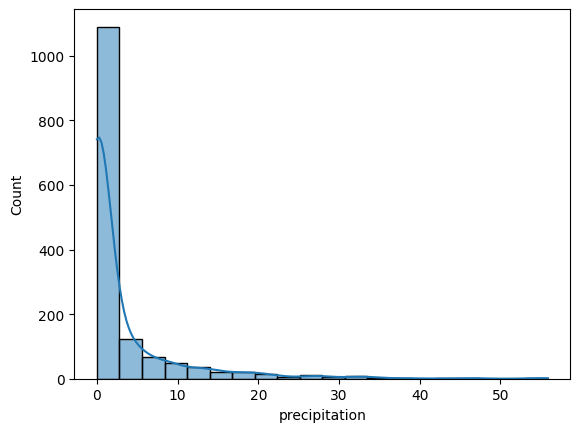

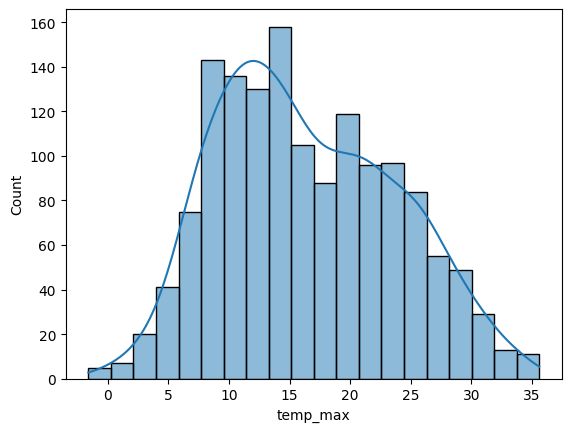

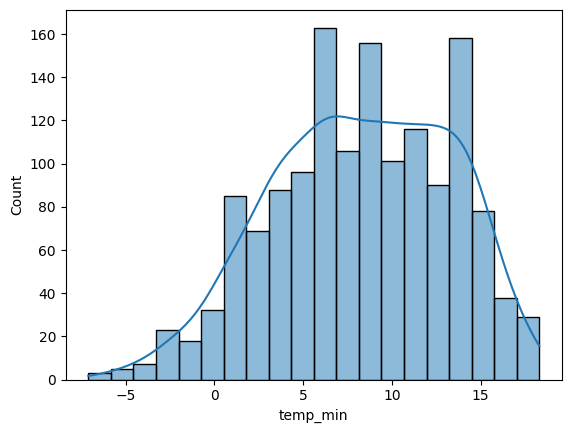

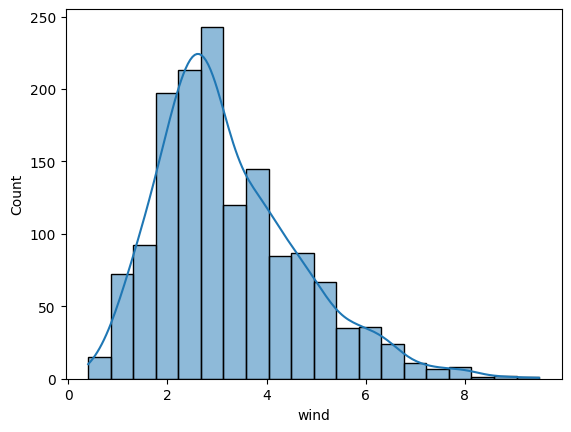

In [ ]:
for feature in features:
  sns.histplot(weather[feature], kde = True, bins = 20)
  plt.show()

In [ ]:
# the data doesnt seem to be normally distributed for the features precipitation, temp_max, temp_min

# Shapiro-Wilk Test

In [ ]:
# to find p value
from scipy.stats import shapiro
for feature in features:
  stat, p = shapiro(weather[feature])
  print(f'Feature: {feature}, Stat: {stat}, p-value: {p}')

Feature: precipitation, Stat: 0.5205678306061179, p-value: 1.1627273421175324e-52
Feature: temp_max, Stat: 0.9802632635945632, p-value: 2.8459439764287343e-13
Feature: temp_min, Stat: 0.9837458888294452, p-value: 9.109896771574584e-12
Feature: wind, Stat: 0.9514108075208795, p-value: 1.3658343644998873e-21


In [ ]:
# since p-values are very small and p<0.05, the features are not in normal distribution

# Transforming the data

In [ ]:
# getting rid of values <= 0

In [ ]:
# taking the features only if they are > 0
#for feature in features:
#  weather = weather[weather[feature] > 0]
# dropping the original feature columns
#weather = weather.drop(columns = features)

In [ ]:
for feature in features:
  weather[feature + '_filtered'] = weather[feature][weather[feature] > 0]

weather['precipitation_log'] = np.log1p(weather['precipitation_filtered'])
weather['temp_max_log'] = np.log1p(weather['temp_max_filtered'])
weather['temp_min_log'] = np.log1p(weather['temp_min_filtered'])
weather['wind_log'] = np.log1p(weather['wind_filtered'])

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    1461 non-null   object 
 1   precipitation           1461 non-null   float64
 2   temp_max                1461 non-null   float64
 3   temp_min                1461 non-null   float64
 4   wind                    1461 non-null   float64
 5   weather                 1461 non-null   object 
 6   precipitation_filtered  623 non-null    float64
 7   temp_max_filtered       1456 non-null   float64
 8   temp_min_filtered       1373 non-null   float64
 9   wind_filtered           1461 non-null   float64
 10  precipitation_log       623 non-null    float64
 11  temp_max_log            1456 non-null   float64
 12  temp_min_log            1373 non-null   float64
 13  wind_log                1461 non-null   float64
dtypes: float64(12), object(2)
memory usage: 

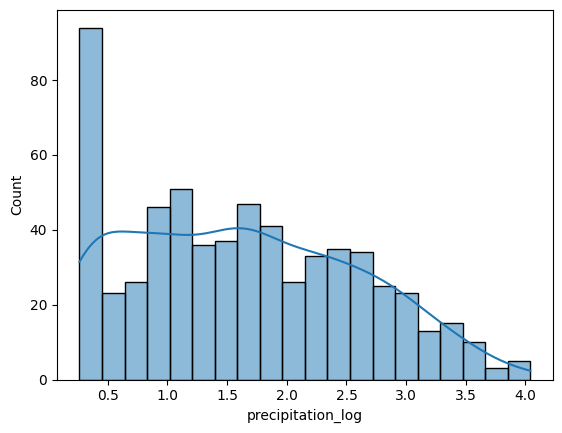

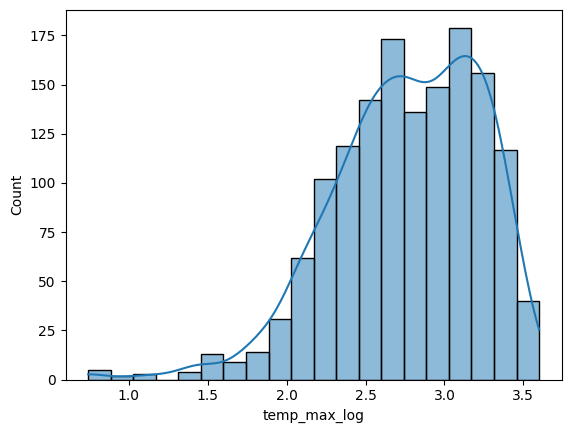

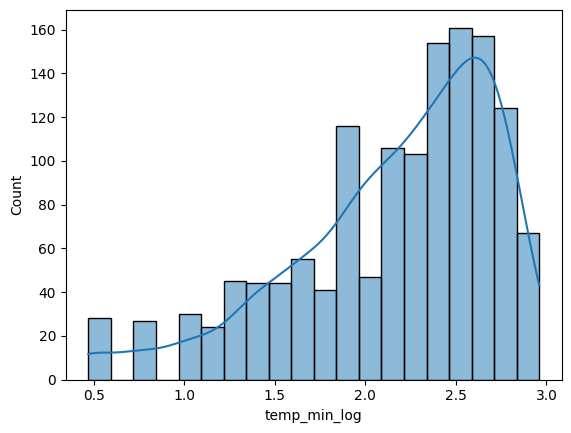

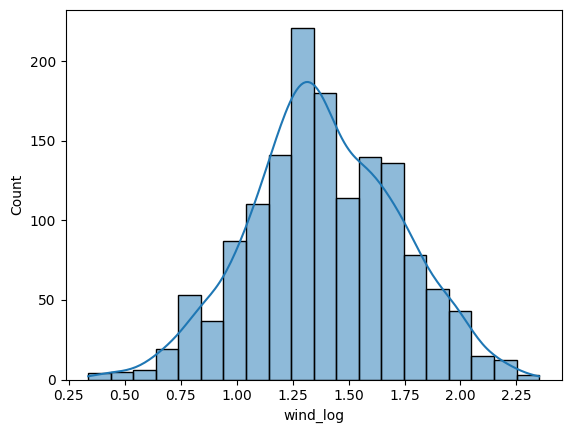

In [ ]:
for feature in ['precipitation_log', 'temp_max_log', 'temp_min_log', 'wind_log']:
  sns.histplot(weather[feature], kde = True, bins = 20)
  plt.show()

In [ ]:
# shapiro-wilk test
from scipy.stats import shapiro
for feature in ['precipitation_log', 'temp_max_log', 'temp_min_log', 'wind_log']:
  stat_log, p_log = shapiro(weather[feature])
  print(f'Feature: {feature}, Stat: {stat_log}, p-value: {p_log}')

Feature: precipitation_log, Stat: nan, p-value: nan
Feature: temp_max_log, Stat: nan, p-value: nan
Feature: temp_min_log, Stat: nan, p-value: nan
Feature: wind_log, Stat: 0.9970907851806613, p-value: 0.008321880195016985


In [ ]:
# there might be some missing values for getting nan
# however p-value of wind-log < 0.5

In [ ]:
# lets try to do other transformation now

In [45]:
from scipy.stats import yeojohnson, boxcox
import numpy as np

# Apply transformations
weather['precipitation_transformed'], _ = yeojohnson(weather['precipitation'])  # Left-skewed
weather['wind_transformed'], _ = yeojohnson(weather['wind'])  # Slight left-skew

# If temp_max and temp_min have only positive values, use Box-Cox; otherwise, use Yeo-Johnson
if (weather['temp_max'] > 0).all():
    weather['temp_max_transformed'], _ = boxcox(weather['temp_max'])
else:
    weather['temp_max_transformed'], _ = yeojohnson(weather['temp_max'])

if (weather['temp_min'] > 0).all():
    weather['temp_min_transformed'], _ = boxcox(weather['temp_min'])
else:
    weather['temp_min_transformed'], _ = yeojohnson(weather['temp_min'])

In [46]:
from scipy.stats import shapiro

features = ['precipitation_transformed', 'temp_max_transformed', 'temp_min_transformed', 'wind_transformed']

for feature in features:
    stat, p = shapiro(weather[feature])
    print(f'Shapiro-Wilk Test for {feature}: p-value = {p:.5f}')


Shapiro-Wilk Test for precipitation_transformed: p-value = 0.00000
Shapiro-Wilk Test for temp_max_transformed: p-value = 0.00000
Shapiro-Wilk Test for temp_min_transformed: p-value = 0.00000
Shapiro-Wilk Test for wind_transformed: p-value = 0.00837


# Standardization of the features

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
weather[['precipitation_scaled', 'temp_max_scaled', 'temp_min_scaled', 'wind_scaled']] = scaler.fit_transform(weather[['precipitation', 'temp_max', 'temp_min', 'wind']])

# **Training the Model**

In [48]:
data = weather.drop(columns = ['date', 'weather'])
target = weather['weather']

In [49]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

In [51]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [53]:
y_pred = model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7950819672131147
              precision    recall  f1-score   support

     drizzle       0.17      0.36      0.24        11
         fog       0.58      0.23      0.33        30
        rain       1.00      0.83      0.91       161
        snow       0.32      1.00      0.48         8
         sun       0.80      0.88      0.84       156

    accuracy                           0.80       366
   macro avg       0.58      0.66      0.56       366
weighted avg       0.84      0.80      0.80       366



# Testing the standardized features

In [56]:
# defining input and target features
data_scaled = weather[['precipitation_scaled', 'temp_max_scaled', 'temp_min_scaled', 'wind_scaled']]
target = weather[['weather']]

In [57]:
# splitting training and testing data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_scaled, target, test_size = 0.25, random_state = 15)

In [59]:
from sklearn.naive_bayes import GaussianNB
model_scaled = GaussianNB()
model_scaled.fit(x_train_scaled, y_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [62]:
y_pred_scaled = model_scaled.predict(x_test_scaled)

In [63]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test_scaled, y_pred_scaled))
print(classification_report(y_test_scaled, y_pred_scaled))

0.8415300546448088
              precision    recall  f1-score   support

     drizzle       0.25      0.11      0.15         9
         fog       0.00      0.00      0.00        30
        rain       0.99      0.90      0.94       156
        snow       0.43      0.75      0.55         4
         sun       0.77      0.98      0.86       167

    accuracy                           0.84       366
   macro avg       0.49      0.55      0.50       366
weighted avg       0.78      0.84      0.80       366



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# we can observe the accuracy_score improved after standardization
# but preformancce of some features improved, and performance of other features dropped after standardization
# this is is because the data is not normally distributed